In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('med-insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [9]:
## Average Expenses of peoples who smokes
df[df.smoker=='yes'].expenses.mean()

32050.23197080292

In [10]:
## Average Expenses of peoples who doesn't smokes
df[df.smoker=='no'].expenses.mean()

8434.268449248118

<Axes: xlabel='age', ylabel='expenses'>

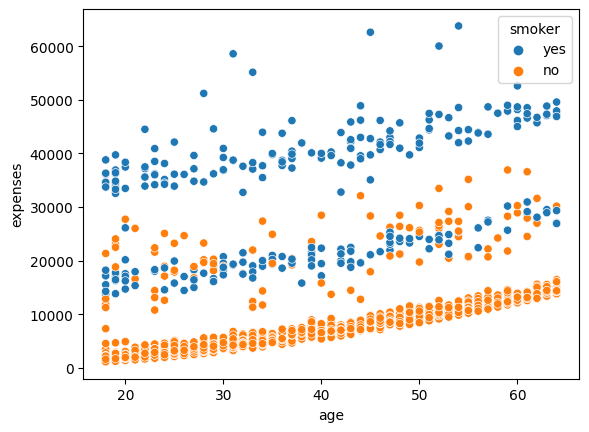

In [11]:
sns.scatterplot(data=df,x='age',y='expenses',hue='smoker')

In [12]:
## Region wise min, avg and max expenses of people who smokes
df1=df[df.smoker=='yes']
df1[['expenses', 'region']].groupby(['region']).agg(['min','mean','max'])

expenses                        
                min          mean       max
region                                     
northeast  12829.46  29673.536269  58571.07
northwest  14711.74  30192.002759  60021.40
southeast  16577.78  34844.997253  63770.43
southwest  13844.51  32269.064138  52590.83

In [13]:
## Region wise min, avg and max expenses of people who doesn't smokes
df2=df[df.smoker=='no']
df2[['expenses', 'region']].groupby(['region']).agg(['min','mean','max'])

expenses                       
               min         mean       max
region                                   
northeast  1694.80  9165.531946  32108.66
northwest  1621.34  8556.463558  33471.97
southeast  1121.87  8032.216300  36580.28
southwest  1241.57  8019.285019  36910.61

In [14]:
# Impact of expenses regionwise
df[['expenses', 'region']].groupby(['region']).agg(['min','mean','max'])

expenses                        
               min          mean       max
region                                    
northeast  1694.80  13406.384691  58571.07
northwest  1621.34  12417.575169  60021.40
southeast  1121.87  14735.411538  63770.43
southwest  1241.57  12346.937908  52590.83

In [15]:
num_cols=[col for col in df.columns if df[col].dtype != 'O']
num_cols

['age', 'bmi', 'children', 'expenses']

In [16]:
cat_cols=[col for col in df.columns if df[col].dtype == 'O']
cat_cols

['sex', 'smoker', 'region']

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
for col in cat_cols:
    df[col]=le.fit_transform(df[col])

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [20]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [21]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1


In [22]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=45)

In [25]:
scaled=StandardScaler()
X_train=scaled.fit_transform(X_train)
X_test=scaled.transform(X_test)

In [26]:
X_train

array([[-1.10834544,  1.        ,  0.3259968 , -0.89844709, -0.51796977,
         0.46506539],
       [-0.11716557, -1.        ,  0.03270935, -0.89844709,  1.9306146 ,
        -1.36009689],
       [ 0.52002149,  1.        , -0.78197802,  3.26465429, -0.51796977,
         1.37764652],
       ...,
       [ 1.44040279, -1.        , -1.12414671, -0.89844709,  1.9306146 ,
        -0.44751575],
       [-1.39153968, -1.        ,  0.74963423, -0.89844709, -0.51796977,
        -0.44751575],
       [-0.32956125, -1.        , -1.14044046, -0.89844709, -0.51796977,
        -1.36009689]])

In [27]:
X_test

array([[-1.179144  ,  1.        , -0.37463433, -0.06582682, -0.51796977,
        -0.44751575],
       [ 0.37842436, -1.        , -0.13022812,  0.76679346, -0.51796977,
         0.46506539],
       [ 1.51120136,  1.        ,  0.13047183,  1.59941374,  1.9306146 ,
        -0.44751575],
       ...,
       [ 0.59082005,  1.        ,  0.27711556, -0.06582682, -0.51796977,
         1.37764652],
       [-0.04636701, -1.        ,  0.68445924,  0.76679346, -0.51796977,
         1.37764652],
       [ 0.8740143 ,  1.        ,  1.04292168, -0.89844709, -0.51796977,
         1.37764652]])

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [29]:
model=LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
pred=model.predict(X_test)
pred

array([ 3471.31328225,  9700.14282853, 39641.83005517,  4548.23431664,
        9104.33907056, 14056.74507836,  4543.00832282, 14875.75064519,
       10772.1484856 , 34816.20648513,  5936.60978852, 12232.65059225,
        8566.32908116,  8544.59932988, 10559.1513515 ,  6970.86186556,
        1405.68498058,  7437.84958712,  7441.58024271, 12170.97594512,
        8254.29741224, 33913.43345329, 15755.39636038, 31762.44888919,
       12240.27822323, 16776.20961682, 30929.85128636, 10571.07648614,
        4405.40511735, 14198.34330348,  8232.20459437, 13028.45373095,
        7103.72510032,  3444.99582131, 11358.95747422,  6352.26370193,
        5226.07758554, 12694.35714886, 38056.24256769, 10108.90384677,
       35496.32703484,  1000.11934996,  8676.1040289 ,  9125.23106985,
        4249.92129094,  7907.6830055 ,  9035.28934864, 13277.39052599,
       12785.11396068, 12107.51800465,  3841.09996153, 39303.55603678,
       10539.42477188, 19092.94148395, 15685.92776247, 12942.06522061,
      

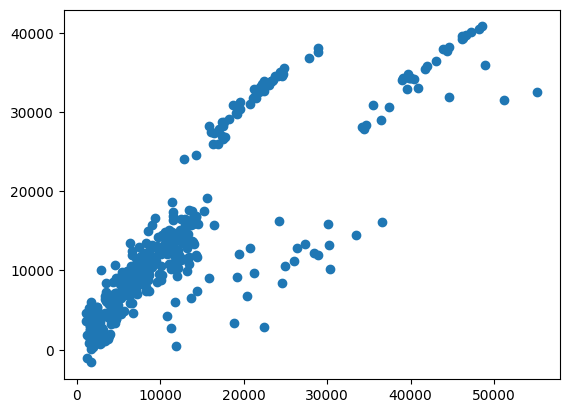

In [32]:
plt.scatter(y_test,pred)

In [33]:
from sklearn.metrics import r2_score
score=r2_score(y_test,pred)
score

0.7108819814486129

In [34]:
x=np.array([25,0,50,1,0,1]).reshape(1,-1)
x.shape

(1, 6)

In [35]:
scaled.transform(x)

array([[-0.96674831, -1.        ,  3.16110884, -0.06582682, -0.51796977,
        -0.44751575]])

In [36]:
model.predict(scaled.transform(x))

array([11039.03765375])

In [37]:
import pickle
pickle.dump(model,open('regmodel.pkl','wb'))
pickle.dump(scaled,open('scaled.pkl','wb'))

In [38]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))
scaled_model=pickle.load(open('scaled.pkl','rb'))

In [39]:
pickled_model.predict(scaled_model.transform(x))

array([11039.03765375])

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.768230,{'fit_intercept': True}
1,lasso,0.768229,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.721028,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
